<a href="https://colab.research.google.com/github/nkhan054002/QuantProjects/blob/main/montecarloVaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##problem solving for probabilistic interpretations
##they can be used to accurately estimate integrals
##press b to mkae a note in full screen mode

monte carlo simulations - the theory/ introduction

simulations evolving randomly


basically we keep on increasing our sample space and find a parameter throughwhich we can find out the value that we want to,
eventually by the theory of large numbers - we will end up at the true value of the variable that we sorted out to find


In [2]:
##what does he mean by reference to not change

In [3]:
##np.random.seed(any number) prevents from np.random operations (that exist below np.random.seed()) to change/randomise multiple times

In [4]:
##Np.random.normal(loc = mean, scale = sigma, size = (a,b))
##np.cumsum - returns the cumulative sum of the previous values of each element of the array

In [5]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 40.3 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [9]:
import pandas as pd
import numpy as np
import yfinance as yf

In [10]:
df = yf.download(tickers = 'AAPL', start = '2019-09-09', end = '2021-09-09')
df = df.loc[:,['Adj Close']]
df.rename(columns = {'Adj Close':'price'}, inplace = True)
df['simple_return'] = df['price'].pct_change()
df['log_return'] = np.log(df['price']/df['price'].shift(1))
df.dropna(inplace = True)
df

[*********************100%***********************]  1 of 1 completed


,price,simple_return,log_return
Date,,,
2019-09-10,53.076561,0.011813,0.011744
2019-09-11,54.764137,0.031795,0.031300
2019-09-12,54.641678,-0.002236,-0.002239
2019-09-13,53.578682,-0.019454,-0.019646
2019-09-16,53.860344,0.005257,0.005243
...,...,...,...
2021-09-01,151.870819,0.004479,0.004469
2021-09-02,153.006042,0.007475,0.007447
2021-09-03,153.653336,0.004231,0.004222


##monte carlo basics


In [13]:
n = int(len(df.index)*0.8)
train = df['price'][:n]
returns_train = df['simple_return'][:n]
returns_test = df['simple_return'][n:]
test = df['price'][n:]

##Can also do this 

import datetime
df_train = df.loc[index_train]
df_test = df.loc[~index_train]


use this or jst use 0.8 method

In [14]:
#n = number of simulations
n = 100
s_0 = train[-1]
##this is -1 since we are going to directly get the testing dataset`s simulations
s_0
T = len(test)
N = len(test)
N_SIM = n
mu = returns_train.mean()
sigma = returns_train.std()

In [15]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, 
                random_seed=42):
    '''
    Function used for simulating stock returns using Geometric Brownian Motion.
    
    Parameters
    ------------
    s_0 : float
    Initial stock price
    mu : float
    Drift coefficient
    sigma : float
    Diffusion coefficient
    n_sims : int
    Number of simulations paths
    dt : float
    Time increment, most commonly a day
    T : float
    Length of the forecast horizon, same unit as dt
    N : int
    Number of time increments in the forecast horizon
    random_seed : int
    Random seed for reproducibility
    
    Returns
    -----------
    S_t : np.ndarray
    Matrix (size: n_sims x (T+1)) containing the simulation results. 
    Rows respresent sample paths, while columns point of time.
    '''''
    np.random.seed(random_seed)
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    ##broadcasts an array into a diffnt shape 
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps 
                      + sigma * W)
    ##basically used the solution of the stochastic differential equation - S0 * exp(((mu - (((sigma)^2)/2)) * t) + Wt*sigma)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    
    return S_t

In [16]:
gbm_simulations = simulate_gbm(s_0, mu, sigma, N_SIM, T, N)

In [17]:
##the above thing bases its whole theory that returns follow a normal distribution
##also im taking simple_returns because thats what they have considered

In [18]:
# prepare objects for plotting 
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
#plot_title = (f'{RISKY_ASSET} Simulation '
#              f'({first_test_date}:{last_test_date})')

selected_indices = df['price'][last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), 
                                 index=index)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

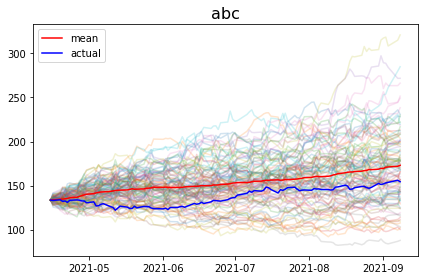

In [20]:
# plotting
##this is the correct way to plot 
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                 color='red')
line_2, = ax.plot(index, df['price'][last_train_date:last_test_date], 
                 color='blue')
ax.set_title('abc', fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()
plt.show()
##there waas a big fall in covid times so yea lol

In [21]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=42, antithetic_var=False):
    '''
    Function used for simulating stock returns using Geometric Brownian Motion.
    
    Parameters
    ------------
    s_0 : float
    Initial stock price
    mu : float
    Drift coefficient
    sigma : float
    Diffusion coefficient
    n_sims : int
    Number of simulations paths
    dt : float
    Time increment, most commonly a day
    T : float
    Length of the forecast horizon, same unit as dt
    N : int
    Number of time increments in the forecast horizon
    random_seed : int
    Random seed for reproducibility
    antithetic_var : bool
    Boolean whether to use antithetic variates approach to reduce variance
    
    Returns
    -----------
    S_t : np.ndarray
    Matrix (size: n_sims x (T+1)) containing the simulation results. 
    Rows respresent sample paths, while columns point of time.
    '''''
    
    np.random.seed(random_seed)
        
    # time increment
    dt = T/N
        
    # Brownian
    if antithetic_var:
        dW_ant = np.random.normal(scale = np.sqrt(dt), 
                                     size=(int(n_sims/2), N + 1))
        dW = np.concatenate((dW_ant, -dW_ant), axis=0)
    else: 
        dW = np.random.normal(scale = np.sqrt(dt), 
                                     size=(n_sims, N + 1))
                
    # simulate the evolution of the process
    S_t = s_0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * dW, 
                                            axis=1)) 
    
    S_t[:, 0] = s_0
                
    return S_t
##antithetic_var is jst an input to the function call

In [23]:
##stock price and exercise price

In [24]:
##so options are contracts for a certain number of shares to buy - in american options - the general is 100
##higher the volatility 0 higher the price of the option - for the same target price ig - since it has more. of a chance to hit that mark

# please start from here

In [25]:
def black_scholes_analytical(S_0, K, T, r, sigma, type='call'):
    '''
    Function used for calculating the price of European options using the analytical form of the Black-Scholes model.
    
    Parameters
    ------------
    s_0 : float
    Initial stock price
    K : float
    Strike price
    T : float
    Time to maturity in years
    r : float
    Annualized risk-free rate
    sigma : float
    Standard deviation of the stock returns
    type : str
    Type of the option. Allowable: ['call', 'put']
    
    Returns
    -----------
    option_premium : float
    The premium on the option calculated using the Black-Scholes model
    '''''
    
    d1 = (np.log(S_0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S_0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if type == 'call':
        val = (S_0 * norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * norm.cdf(d2, 0, 1))
    elif type == 'put':
        val = (K * np.exp(-r * T) * norm.cdf(-d2, 0, 1) - S_0 * norm.cdf(-d1, 0, 1))
    else:
        raise ValueError('Wrong input for type!')
                
    return val

In [26]:
S_0 = 100
K = 100
r = 0.05
sigma = 0.50
T = 1 # 1 year
N = 252 # 252 days in a year
dt = T / N # time step
N_SIMS = 100000 # number of simulations
discount_factor = np.exp(-r * T)

In [27]:
import numpy as np
from scipy.stats import norm

In [28]:
black_scholes_analytical(S_0=S_0, K=K, T=T, r=r, sigma=sigma, type='call')
##returns the price ig

21.79260421286685

In [29]:
gbm_sims = simulate_gbm(s_0=S_0, mu=r, sigma=sigma, 
                       n_sims=N_SIMS, T=T, N=N)

In [30]:
gbm_sims[:,-1]

array([ 96.23868906, 102.28464895,  51.9672302 , ...,  44.38740391,
        69.96459059,  80.61057537])

In [31]:
K

100

    s_0 : float
    Initial stock price
    K : float
    Strike price

In [32]:
premium = discount_factor * np.mean(np.maximum(0, gbm_sims[:, -1] - K))
premium
##why are we including a 0

21.63279839570765

In [33]:
##what does this mean


##VAR - value at risk

In [34]:
##will do option pricing later on - with sr`s help

In [35]:
##VAR - basically:
##at 5% Var means - we have 95% confidence htat the maximum amt of loss wont exceed x dollars
##now the below calculations are done to calc that

In [36]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns

In [37]:
RISKY_ASSETS = ['GOOG', 'FB']
SHARES = [5, 5]
##the amt that ur buying in each
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'
T = 1
N_SIMS = 10 ** 5

In [38]:
df = yf.download(RISKY_ASSETS, start=START_DATE, 
                end=END_DATE, adjusted=True)
print(f'Downloaded {df.shape[0]} rows of data.')

[*********************100%***********************]  2 of 2 completed
Downloaded 250 rows of data.


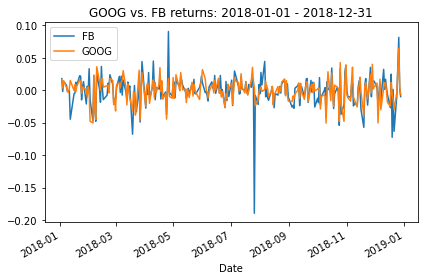

Correlation between returns: 0.62


In [39]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
plot_title = f'{" vs. ".join(RISKY_ASSETS)} returns: {START_DATE} - {END_DATE}'
returns.plot(title=plot_title)

plt.tight_layout()
plt.show()

print(f'Correlation between returns: {returns.corr().values[0,1]:.2f}')

In [40]:
cov_mat = returns.cov()
cov_mat

,FB,GOOG
FB,0.000575,0.000265
GOOG,0.000265,0.000315


CHOLESKY DECOMPOSITION 

is into the product of a lower triangular matrix and its conjugate transpose.

Conjugate of a matrix is the matrix obtained from matrix 'P' on replacing its elements with the corresponding conjugate complex numbers.

**So basically for matrices with only real entries, it is basically the transpose, nice ...**

In [41]:
chol_mat = np.linalg.cholesky(cov_mat)
chol_mat
##hence cov_mat = (chol_mat)*((chol_mat).T)

array([[0.02397825, 0.        ],
       [0.01105642, 0.01389752]])

In [42]:
A = chol_mat
A

array([[0.02397825, 0.        ],
       [0.01105642, 0.01389752]])

In [43]:
A.T

array([[0.02397825, 0.01105642],
       [0.        , 0.01389752]])

In [44]:
print(cov_mat)
np.dot(A,A.T)

            FB      GOOG
FB    0.000575  0.000265
GOOG  0.000265  0.000315


array([[0.00057496, 0.00026511],
       [0.00026511, 0.00031539]])

In [45]:
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv)))
##mkaes a normal distribution with std dev = 1
##correlated_rv -> comprises of 2 random normal distribution -> which are correlated in the same way as the 2 stocks lol

In [46]:
(pd.DataFrame(correlated_rv)).cov()
#0.000266 and 0.000266 -> ehh close enough...

,0,1
0,0.000573,0.000264
1,0.000264,0.000316


In [47]:
print(rv[:,0].shape)
#??rv[:,0]
rv[:,0].var()
##variance is close to 1

(100000,)


0.9960295240009073

In [48]:
print(np.transpose(chol_mat))
chol_mat
##chol_mat.T == np.transpose(chol_mat)

[[0.02397825 0.01105642]
 [0.         0.01389752]]


array([[0.02397825, 0.        ],
       [0.01105642, 0.01389752]])

In [49]:
r = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = adj_close.values[-1, :]
P_0 = np.sum(SHARES * S_0)

In [50]:
adj_close

,FB,GOOG
Date,,
2018-01-02,181.419998,1065.000000
2018-01-03,184.669998,1082.479980
2018-01-04,184.330002,1086.400024
2018-01-05,186.850006,1102.229980
2018-01-08,188.279999,1106.939941
...,...,...
2018-12-21,124.949997,979.539978
2018-12-24,124.059998,976.219971
2018-12-26,134.179993,1039.459961


In [51]:
##S_0
##the above thing gives us the final prices -> i.e. the initial price in the prediction model
##returns
##these are the actual returns -> and not the monte carlo sims

In [52]:
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T + 
                  sigma * np.sqrt(T) * correlated_rv)

In [53]:
print(S_T.shape)
print(r)
#print
S_T
##lol S_T is jst the price over the next day lol

(100000, 2)
[-9.42928447e-04  5.11110600e-05]


array([[ 133.07959402, 1037.08733856],
       [ 133.11427675, 1037.15434409],
       [ 132.93960185, 1036.67417841],
       ...,
       [ 133.09796184, 1037.09749226],
       [ 133.00211075, 1036.97755256],
       [ 132.8866424 , 1036.44429199]])

In [54]:
P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0

In [55]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]

In [56]:
print(P_diff_sorted.size)
P_diff_sorted
type(P_diff_sorted)

100000


numpy.ndarray

In [57]:
var = np.percentile(P_diff_sorted, percentiles)
##helps match the percentile values

In [58]:
var
##the price difference that we will face

array([-8.30490324, -7.21006531, -5.78646409])

In [59]:
for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: {-y:.2f}$')

1-day VaR with 99.99% confidence: 8.30$
1-day VaR with 99.9% confidence: 7.21$
1-day VaR with 99.0% confidence: 5.79$


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


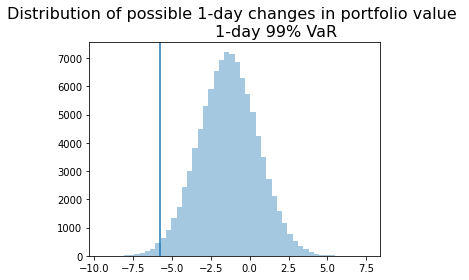

In [60]:
ax = sns.distplot(P_diff, kde=False)
ax.set_title('''Distribution of possible 1-day changes in portfolio value 
                1-day 99% VaR''''', fontsize=16)
ax.axvline(var[2], 0, 10000)

plt.tight_layout()
plt.show()
#make bins plot frequency, and judge what region is the lowest 1% at, hecne 99% VaR

In [61]:
print(var[2])
##this is the amt of loss we will loose with 99% confidence

-5.786464094560497
